In [2]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values, remove_value
from ipynb.fs.full.plots import single_barplot

In [3]:
# get formatted and ready to use dataframe
df = get_df()

In [4]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [5]:
# mapping of old labels to new one
d4_rename_mapping = {
    'Project Lead / Project Manager': 'Project Lead / Project Manager',
    'Business Analyst': 'Business Analyst',
    'Requirements Engineer': 'Requirements Engineer',
    'Solution Architect': 'Solution Architect',
    'Data Scientist': 'Data Scientist',
    'Developer': 'Developer',
    'Test Manager / Tester': 'Test Manager / Tester',
    'Other, which one?': 'Other'
}

In [6]:
remove_value(df,'0','D4_Role')
# index of our barplot
indexes = list(df['D4_Role'].value_counts().index)
# total answers of each index
values = list(df['D4_Role'].value_counts())
# dataframe specific for question D4
d4_df= pd.DataFrame(data={'Main Role': rename_values(d4_rename_mapping, indexes), 'Answers': values})

In [7]:
#drop all rows that have 'Other, which one?' selected - it will be displayed in other view
d4_df = d4_df[d4_df['Main Role'] != 'Other']

In [8]:
df['D4_Role_Others'].value_counts().index

Index(['-99', 'Researcher', 'Data Analyst', 'Professor',
       'Machine Learning Engineer', 'Data Engineer', 'Student',
       'Publishing company', 'Research Assistant', 'Data Manager',
       'data analyst', 'Especialista em Prevenção a Fraudes', 'Founder',
       'SW Architect', 'Managing Director & Team Lead Data Science',
       ' Operational Research Analyst', 'Analista de Segurança',
       'Technology Advisor', 'Developer /  Data Scientist',
       'Student Assistant, Data Science', 'Fiscal de Empresas terceirizadas',
       'Data Director', 'Engineer', 'Technical lead', 'Engenheiro de dados',
       'Release Train Engineer', 'Process Engineer', 'FP&A coordinator',
       'Research student', 'Enterprise, system, solution architect',
       'Consultant', 'Director', 'CEO and CTO', 'Lecturer', 'Bolsista ',
       'PhD student DataScience applied in astrophysics',
       'Maintenance Engineer', 'technical director',
       'Both developer and data scientist ',
       'I am both D

In [9]:
# some people answered in the others field some of the listed options
extra_data_science = df['D4_Role_Others'].value_counts()['Student Assistant, Data Science'] + df['D4_Role_Others'].value_counts()['PhD student DataScience applied in astrophysics'] + df['D4_Role_Others'].value_counts()['I am both Data Scientist and Software Engineer']
        
extra_solution_architect = df['D4_Role_Others'].value_counts()['Enterprise, system, solution architect']

extra_developer = df['D4_Role_Others'].value_counts()['Both developer and data scientist '] + df['D4_Role_Others'].value_counts()['Developer /  Data Scientist']

In [10]:
d4_df[d4_df['Main Role'] == 'Data Scientist'] = ['Data Scientist', int(d4_df[d4_df['Main Role'] == 'Data Scientist']['Answers']) + extra_data_science]
d4_df[d4_df['Main Role'] == 'Developer'] = ['Developer', int(d4_df[d4_df['Main Role'] == 'Developer']['Answers']) + extra_developer]
d4_df[d4_df['Main Role'] == 'Solution Architect'] = ['Solution Architect', int(d4_df[d4_df['Main Role'] == 'Solution Architect']['Answers']) + extra_solution_architect]

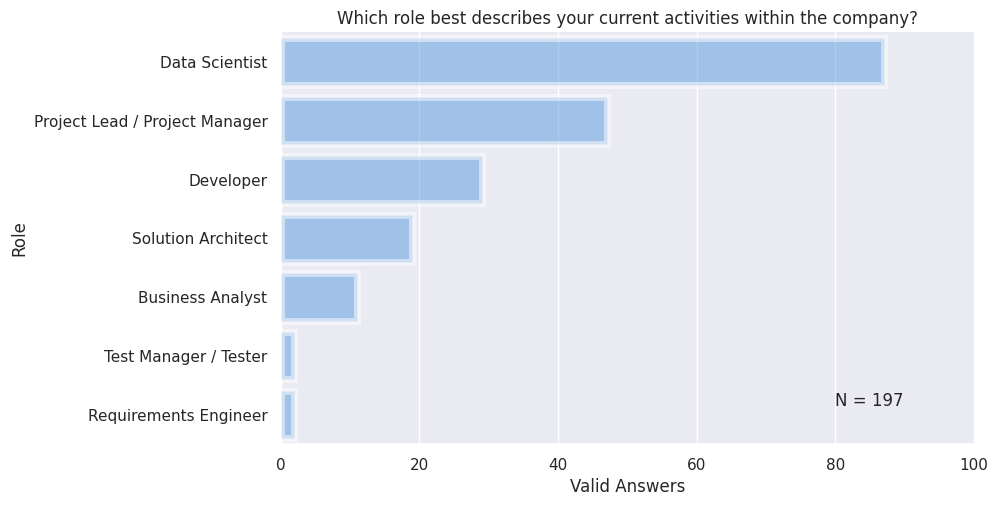

In [11]:
# compute total of answer considered in this question
total_answers = "N = " + str(sum(d4_df['Answers']))

single_barplot(d4_df, "Answers", "Main Role", title="Which role best describes your current activities within the company?",
               x_label="Valid Answers", y_label="Role", color="#429bf5",total_answers=total_answers)